In [1]:
import math
import numpy as np

import Library.Midsem as t1
from Library.Assign4 import NewtonR #Importing Newton Raphson from Assign4.py module
from Library.Assign3 import GS,chelk #Imposting Guass-Seidel and chelosky from Assign3.py module
import Library.Class6 as t2

file= open('msem_gs.txt')
inp= file.readlines()  #Reading data from input file into array inp

Question 1: Area of ellipse

In [2]:
t1.ellipse(0.1,0.03,100000)

Area of ellispe: 6.2952
Error: 0.19 %



Question 2: Wein’s displacement law states that black body radiation for different tempera-tures peak at different wavelengths (λm) that are inversely proportional to the

In [3]:
def fun1(x): 
    k=(x-5)*math.exp(x)+5
    return k

def fun2(x): #Differentiation of fun1
    k=(x-4)*math.exp(x)
    return k

t1.Wein(NewtonR(5,fun1,fun2,4),2) #4 precision

Root: 4.96511423174643 , Value: 2.978897128969038e-10 
Iteration: 3 

Wein's constant b: 28.99 * 10^(-4)


Question 3: Solve the linear system of equation A x = b, where A and b are given in the file msem_gs.txt using Gauss-Seidel iterative methods to a precision of 10−6

In [4]:
A= [[float(n) for n in inp[i].split('    ')] for i in range(1,7)]
B= [[float(n) for n in inp[i].split('    ')] for i in range(9,15)]
print("\nGuass-Seidal:")
GS(A,B,6) #Precision 6, max iterations= 300


Guass-Seidal:
Number of iterations: 13 
Solution matrix X:

1.4999998297596435
-0.4999999999999992
1.9999999999999998
-2.499999914864037
1.0000000000000004
-0.9999999999957907


Question 4: Fit the data given in msem fit.txt with power law y = a*(x^b) and exponential y = a*exp(−bx) models. And determine the better bit from r^2.


Error (a1): 1.0843187787790949 
Error (a2): 0.22311347707717552
r^2: 0.7750435352872259

Solution Matrix for the coeffiecients: 
3.0467
-0.5374

a=  21.045778632630523

b=  -0.5374 



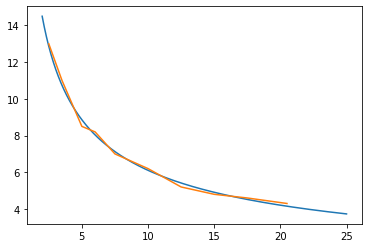

In [5]:
file2= open('msem_fit.txt')
inp= file2.readlines()  #Reading data from input file into array inp

A= [[math.log(float(inp[i].split(' ')[0]))] for i in range(0,10)] #A stores the logarithmic values for x values in data
B= [[math.log(float(inp[i].split(' ')[1]))] for i in range(0,10)] #B stores the logarithmic values for y values in data
M= [[float(inp[i].split(' ')[0])] for i in range(0,10)] 
N= [[float(inp[i].split(' ')[1])] for i in range(0,10)] 


#Fitting in y=a(x^b)
C,D=t2.Fit(A,B,2) #Fit function from Class6.py module

print("Solution Matrix for the coeffiecients: ")
D=chelk(C,D,4) #Chelosky decomposition to solve C,D

#Printing coefficients
print("\na= ",math.exp(D[0][0]))
print("\nb= ",D[1][0],"\n")

def func3(x,D): return math.exp(D[0][0])*(x**(D[1][0])) #Converting the straight line function into its original form

t2.FitPlot(M,N,2,25,func3,D)



Error (a1): 0.3911208151382824 
Error (a2): 0.002911208151382824
r^2: 0.5762426888065756

Solution Matrix for the coeffiecients: 
2.503
-0.0585

a=  12.219096318670772

b=  0.0585 



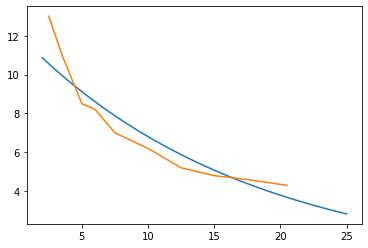

In [6]:
#Fitting in y=a(e^(-xb))
C,D=t2.Fit(M,B,2) #Fit function from Class6.py module
print("Solution Matrix for the coeffiecients: ")
D=chelk(C,D,4) #Chelosky decomposition to solve C,D

#Printing coefficients
print("\na= ",math.exp(D[0][0]))
print("\nb= ",-D[1][0],"\n")

def func4(x,D): return math.exp(D[0][0])*np.exp(x*D[1][0]) #Converting the straight line function into its original form

t2.FitPlot(M,N,2,25,func4,D)

Comparing values of r^2 of the two functions we see that function 1 is a better fit since r^2 for it is closer to 1 than for function 2